Exercise 1 Regional temperature and precipittaion analysis

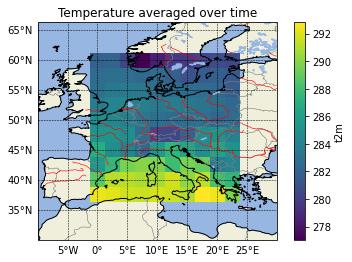

In [31]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings('ignore')

#read file
fname='2000monthly-surft-prec.nc'
ds = xr.open_dataset(fname)

#select 25 X 25 box
t=ds.t2m
i1=np.where(t.latitude<48+12.5)[0][0]
i2=np.where(t.latitude>48-12.5)[0][-1]
i3=np.where(t.longitude<25)[0][-1]

temp=t.isel(longitude=slice(0,i3+1),latitude=slice(i1,i2+1))
prec=ds.lsp.isel(longitude=slice(0,i3+1),latitude=slice(i1,i2+1))
#Temperature averaged over time
fig=plt.figure()
ax=plt.gca(projection=ccrs.PlateCarree())
ax.set_extent([-10, 30, 30, 65])

t_av=temp.mean(dim="time")
t_av.plot()

ax.coastlines()
ax.set_title("Temperature averaged over time")
ax.add_feature(cfeature.BORDERS, linewidth=0.6, edgecolor='gray')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS, linewidth=0.6, edgecolor='red')
gl=ax.gridlines(draw_labels=True,
linewidth=0.5, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

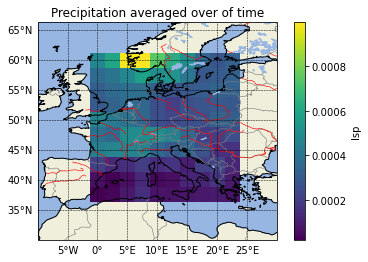

In [32]:
#Precipitation averaged over time
fig=plt.figure()
ax=plt.gca(projection=ccrs.PlateCarree())
ax.set_extent([-10, 30, 30, 65])

p_av=prec.mean(dim="time")
p_av.plot()

ax.coastlines()
ax.set_title("Precipitation averaged over of time")
ax.add_feature(cfeature.BORDERS, linewidth=0.6, edgecolor='gray')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS, linewidth=0.6, edgecolor='red')
gl=ax.gridlines(draw_labels=True,
linewidth=0.5, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

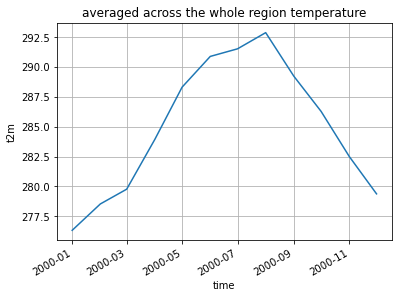

In [33]:
#calculate and plot averaged temperature as a function of time
t_av=temp.mean(dim=["latitude","longitude"])
t_av.plot()
plt.title("averaged across the whole region temperature")
plt.grid()


the warmest month in 2000 is August

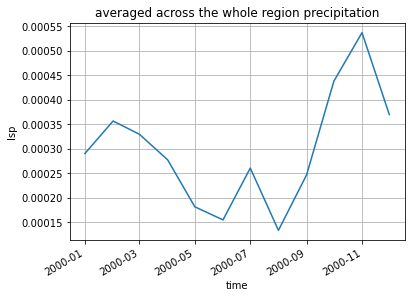

In [34]:
#calculate and plot averaged precipitation as a function of time
p_av=prec.mean(dim=["latitude","longitude"])
p_av.plot()
plt.title("averaged across the whole region precipitation")
plt.grid()


the driest month in 2000 is also August

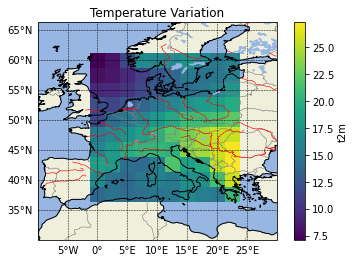

In [35]:
#calculate and plot temperature variation
fig=plt.figure()
ax=plt.gca(projection=ccrs.PlateCarree())
ax.set_extent([-10, 30, 30, 65])

t_var=temp.max(dim="time")-temp.min(dim="time")
t_var.plot()

ax.coastlines()
ax.set_title("Temperature Variation")
ax.add_feature(cfeature.BORDERS, linewidth=0.6, edgecolor='gray')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS, linewidth=0.6, edgecolor='red')
gl=ax.gridlines(draw_labels=True,
linewidth=0.5, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False


we find the largest temperature variation is in the low latitude and in the land (brightest yellow part); the smallest temperature variation in high latitude and in the ocean (darkest blue part)

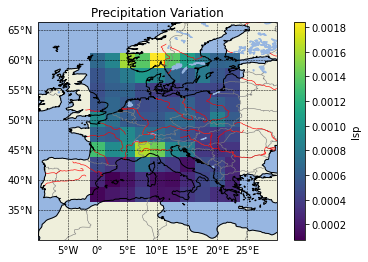

In [36]:
#calculate and plot precipitation variation
fig=plt.figure()
ax=plt.gca(projection=ccrs.PlateCarree())
ax.set_extent([-10, 30, 30, 65])

P_var=prec.max(dim="time")-prec.min(dim="time")
P_var.plot()

ax.coastlines()
ax.set_title("Precipitation Variation")
ax.add_feature(cfeature.BORDERS, linewidth=0.6, edgecolor='gray')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS, linewidth=0.6, edgecolor='red')
gl=ax.gridlines(draw_labels=True,
linewidth=0.5, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False


we find the lowest precipitation variation is in mediterranean region.

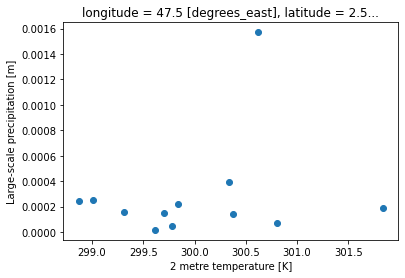

In [37]:
#choose Paris(48N,2E) and scatter t2m and lsp
ds=xr.open_dataset("2000monthly-surft-prec.nc")
paris=ds.sel(longitude=48, latitude=2,method="nearest")
paris.plot.scatter(x="t2m",y="lsp")


generally we see precipitations are always stable in almost all months, except one. But temperatures vary in time.


Exercise 5 Seaonal temperature and precipitaion patterns

In [38]:
seasonal_mean = ds.groupby("time.season").mean()
print(seasonal_mean)

<xarray.Dataset>
Dimensions:    (longitude: 144, latitude: 73, season: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    lsp        (season, latitude, longitude) float32 7.684e-05 ... 3.76e-05
    t2m        (season, latitude, longitude) float32 246.0 246.0 ... 225.0 225.0


Text(0.5, 1.0, 'Seasonal zonally averaged temperature (k)')

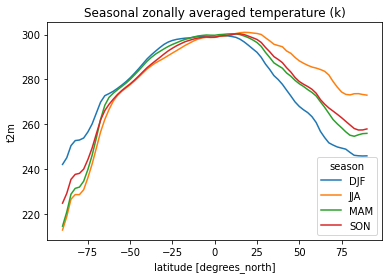

In [39]:
seasonal_mean.t2m.mean("longitude").plot.line(hue="season", x="latitude")
plt.title("Seasonal zonally averaged temperature (k)")

Text(0.5, 1.0, 'Seasonal zonally averaged precipitation mm')

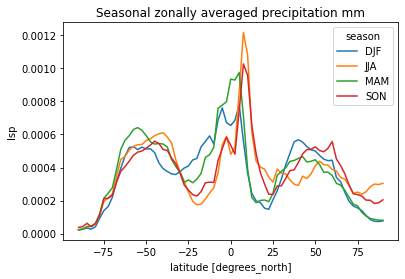

In [40]:
seasonal_mean.lsp.mean("longitude").plot.line(hue="season", x="latitude")
plt.title("Seasonal zonally averaged precipitation mm")

From the graph above, we see the wettest season in equatorial region is Spring (JJA)

In [41]:
seasonal_var= ds.groupby("time.season").max()-ds.groupby("time.season").min()
seasonal_var

<xarray.Dataset>
Dimensions:    (longitude: 144, latitude: 73, season: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    lsp        (season, latitude, longitude) float32 7.648e-05 ... 1.798e-05
    t2m        (season, latitude, longitude) float32 4.377 4.377 ... 27.72 27.72

Text(0.5, 1.03, 'inter-seasonal Temperature variability  ')

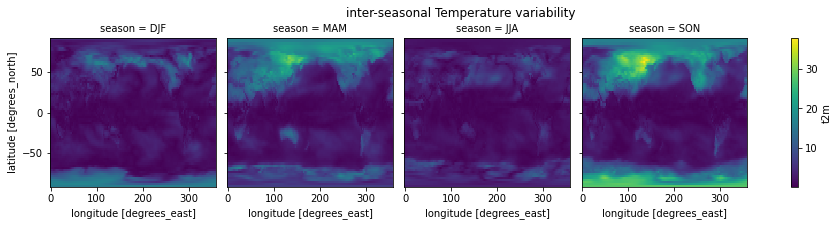

In [42]:
seasonal_var = seasonal_var.reindex(season=["DJF", "MAM", "JJA", "SON"])
seasonal_var.t2m.plot(col='season')
plt.suptitle("inter-seasonal Temperature variability  ",y=1.03)

From the graph above, we see the greatest temperature variation can be observed in Autumn (SON)

Exercise 3 Global atmosphereic circulation pattern

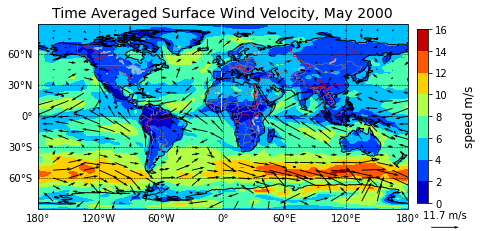

In [43]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

surf = xr.open_dataset('May2000-surf.nc')
uvt = xr.open_dataset('May2000-uvt.nc')

ws = np.sqrt(surf.u10**2+surf.v10**2)
ws_avg = np.nanmean(ws, axis=0)
u_avg = surf.u10.mean(dim='time')
v_avg = surf.v10.mean(dim='time')
lons = ws.longitude
lats = ws.latitude

qsx=6        # step along x axis
qsy=3        # step along y axis
x=lons.isel(longitude=slice(0,144,qsx))
y=lats.isel(latitude=slice(0,73,qsy))
u=u_avg.isel(longitude=slice(0,144,qsx),latitude=slice(0,73,qsy))
v=v_avg.isel(longitude=slice(0,144,qsx),latitude=slice(0,73,qsy))

fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linewidth=0.6, edgecolor='gray')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS, linewidth=0.6, edgecolor='red')
gl=ax.gridlines(draw_labels=True,
linewidth=0.5, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

plt.contourf(lons, lats, ws_avg,cmap=plt.cm.jet)
plt.title('Time Averaged Surface Wind Velocity, May 2000', size=14)
cb=plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('speed m/s',size=12,rotation=90,labelpad=15)
cb.ax.tick_params(labelsize=10)
# Overlay wind vectors
wmax=np.amax(np.sqrt(u**2+v**2)).values #find maximal windspeed
qv = plt.quiver(x,y, u, v,angles="uv",color='k')
q_typ=wmax
Qkey = ax.quiverkey(qv, 1.1, -0.1 , q_typ, '%.1f m/s' % q_typ, coordinates='axes')

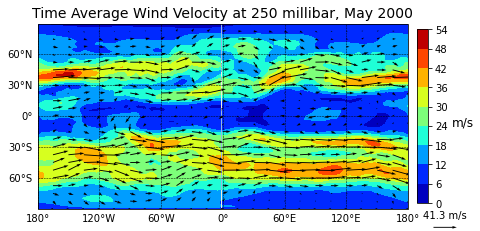

In [44]:
tropopause=uvt.sel(level=250)
ws_tropo = np.sqrt(tropopause.u**2+tropopause.v**2)
ws_avg = np.nanmean(ws_tropo, axis=0)
u_avg = tropopause.u.mean(dim='time')
v_avg = tropopause.v.mean(dim='time')

qsx=6        # step along x axis
qsy=3        # step along y axis
x=lons.isel(longitude=slice(0,144,qsx))
y=lats.isel(latitude=slice(0,73,qsy))
u=u_avg.isel(longitude=slice(0,144,qsx),latitude=slice(0,73,qsy))
v=v_avg.isel(longitude=slice(0,144,qsx),latitude=slice(0,73,qsy))

fig = plt.figure(figsize=(8,4))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,linewidth=1, edgecolor='k')
ax.add_feature(cfeature.OCEAN)

gl=ax.gridlines(draw_labels=True,
linewidth=0.5, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

plt.contourf(lons, lats, ws_avg,cmap=plt.cm.jet)
plt.title('Time Average Wind Velocity at 250 millibar, May 2000', size=14)
cb=plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

# Overlay wind vectors
wmax=np.amax(np.sqrt(u**2+v**2)).values #find maximal windspeed
qv = plt.quiver(x,y, u, v,angles="uv",color='k')
q_typ=wmax
Qkey = ax.quiverkey(qv, 1.1, -0.1 , q_typ, '%.1f m/s' % q_typ, coordinates='axes')

#we see at surface windspeed in much smaller and directions vary at differenct regions.large winds are mainly located at 60S.However, at tropopause, windspeed is much larger and the directions are almost horizonal. speeds at subtropics are larger than that at equator 
#or pole regions

In [45]:
##add windspeed variables to netCDF file
wind_speed = np.sqrt(uvt.u**2+uvt.v**2)
uvt["wind_speed"]=wind_speed # add windspeed
uvt.to_netcdf("May2000-uvt-speed.nc") #save to a new file
uvt

<xarray.Dataset>
Dimensions:     (longitude: 144, latitude: 73, level: 7, time: 31)
Coordinates:
  * longitude   (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude    (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * level       (level) int32 1 10 100 250 500 775 1000
  * time        (time) datetime64[ns] 2000-05-01T12:00:00 ... 2000-05-31T12:0...
Data variables:
    t           (time, level, latitude, longitude) float32 ...
    u           (time, level, latitude, longitude) float32 0.08659 ... 6.298
    v           (time, level, latitude, longitude) float32 -3.743 ... 1.53
    wind_speed  (time, level, latitude, longitude) float32 3.744 3.744 ... 6.481
Attributes:
    Conventions:  CF-1.6
    history:      2021-05-02 22:12:40 GMT by grib_to_netcdf-2.21.0: grib_to_n...

In [46]:
#Exercise 4. merge netCDFs and decadal trends

<xarray.Dataset>
Dimensions:    (time: 24, longitude: 144, latitude: 73)
Coordinates:
  * time       (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2000-12-01
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
Data variables:
    lsp        (time, latitude, longitude) float32 0.0001352 ... 2.009e-05
    t2m        (time, latitude, longitude) float32 252.2 252.2 ... 248.6 248.6
Attributes:
    Conventions:  CF-1.6
    history:      2021-05-11 11:57:29 GMT by grib_to_netcdf-2.21.0: grib_to_n...


Text(0.5, 1.0, 'decal trends of globally averaged surface temperature')

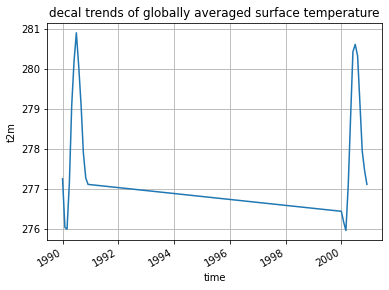

In [47]:
suf='1990monthly-surft-prec.nc'
suf1='2000monthly-surft-prec.nc'
ds1=xr.open_dataset(suf)
ds2=xr.open_dataset(suf1)

ds= xr.merge([ds1,ds2])
print(ds)

t_av=ds.t2m.mean(dim=["latitude","longitude"])
t_av.plot()
plt.grid()
plt.title("decal trends of globally averaged surface temperature")


Text(0.5, 1.0, 'zonal averaged temperature from 1990-2000')

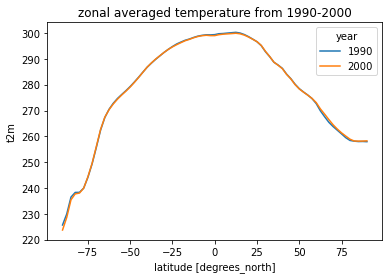

In [48]:
t_year=ds.t2m.groupby("time.year")
zonal_av=t_year.mean(["time","longitude"])
zonal_av.plot.line(hue="year", x="latitude")
plt.title("zonal averaged temperature from 1990-2000")

Text(0.5, 1.0, 'zonal averaged precipitation from 1990-2000')

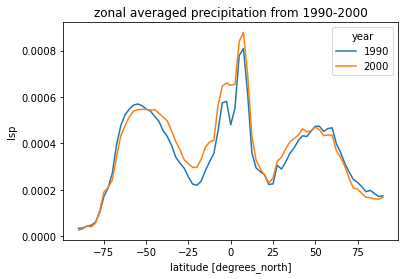

In [49]:
t_year=ds.lsp.groupby("time.year")
zonal_av=t_year.mean(["time","longitude"])
zonal_av.plot.line(hue="year", x="latitude")
plt.title("zonal averaged precipitation from 1990-2000")

In [50]:
##Exercise 2 Strorm detection

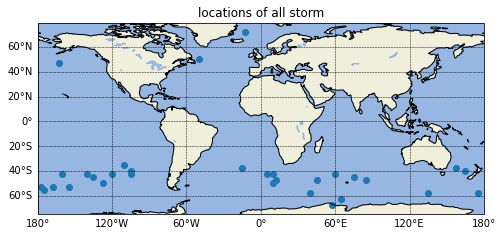

In [51]:
#read file
fname='May2000-uvt.nc'
ds = xr.open_dataset(fname)
ds=ds.sel(level=1000)
wind_speed = np.sqrt(ds.u**2+ds.v**2)
ds["wind_speed"]=wind_speed
max_ws=ds.wind_speed.max(dim=["latitude","longitude"])
storm=ds.wind_speed.where(ds.wind_speed>20)

fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
gl=ax.gridlines(draw_labels=True,
linewidth=0.5, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax.set_title("locations of all storm")

t,lat,lon=np.where(ds.wind_speed==max_ws)
plt.scatter(ds.longitude[lon],ds.latitude[lat])